# Analyze activation values

### Load data

In [2]:
import numpy as np
fast_model_fast_data = np.load("nighttime_ai_fast_model_fast_data_activations.npy")
fast_model_slow_data = np.load("nighttime_ai_fast_model_slow_data_activations.npy")
slow_model_fast_data = np.load("nighttime_ai_slow_model_fast_data_activations.npy")
slow_model_slow_data = np.load("nighttime_ai_slow_model_slow_data_activations.npy")

# each fold's activations were saved separately
fast_model_slow_data = fast_model_slow_data.mean(axis=0)
slow_model_fast_data = slow_model_fast_data.mean(axis=0)

### Sanity check dimensions

In [3]:
[d.shape for d in (fast_model_fast_data, fast_model_slow_data, slow_model_fast_data, slow_model_slow_data)]

[(19250, 256), (20304, 256), (19250, 256), (20304, 256)]

In [5]:
fast_model_fast_data_neuron_means = np.mean(np.abs(fast_model_fast_data), axis=0)
fast_model_slow_data_neuron_means = np.mean(np.abs(fast_model_slow_data), axis=0)
slow_model_fast_data_neuron_means = np.mean(np.abs(slow_model_fast_data), axis=0)
slow_model_slow_data_neuron_means = np.mean(np.abs(slow_model_slow_data), axis=0)

fast_model_fast_data_neuron_std = np.std(fast_model_fast_data, axis=0)
fast_model_slow_data_neuron_std = np.std(fast_model_slow_data, axis=0)
slow_model_fast_data_neuron_std = np.std(slow_model_fast_data, axis=0)
slow_model_slow_data_neuron_std = np.std(slow_model_slow_data, axis=0)

[d.mean() for d in [
    fast_model_fast_data_neuron_means,
    fast_model_slow_data_neuron_means,
    slow_model_fast_data_neuron_means,
    slow_model_slow_data_neuron_means
]]

[0.466, 0.3135, 0.321, 0.4536]

In [6]:
[d.mean() for d in [
    fast_model_fast_data_neuron_std,
    fast_model_slow_data_neuron_std,
    slow_model_fast_data_neuron_std,
    slow_model_slow_data_neuron_std
]]

[0.464, 0.2134, 0.2406, 0.4832]

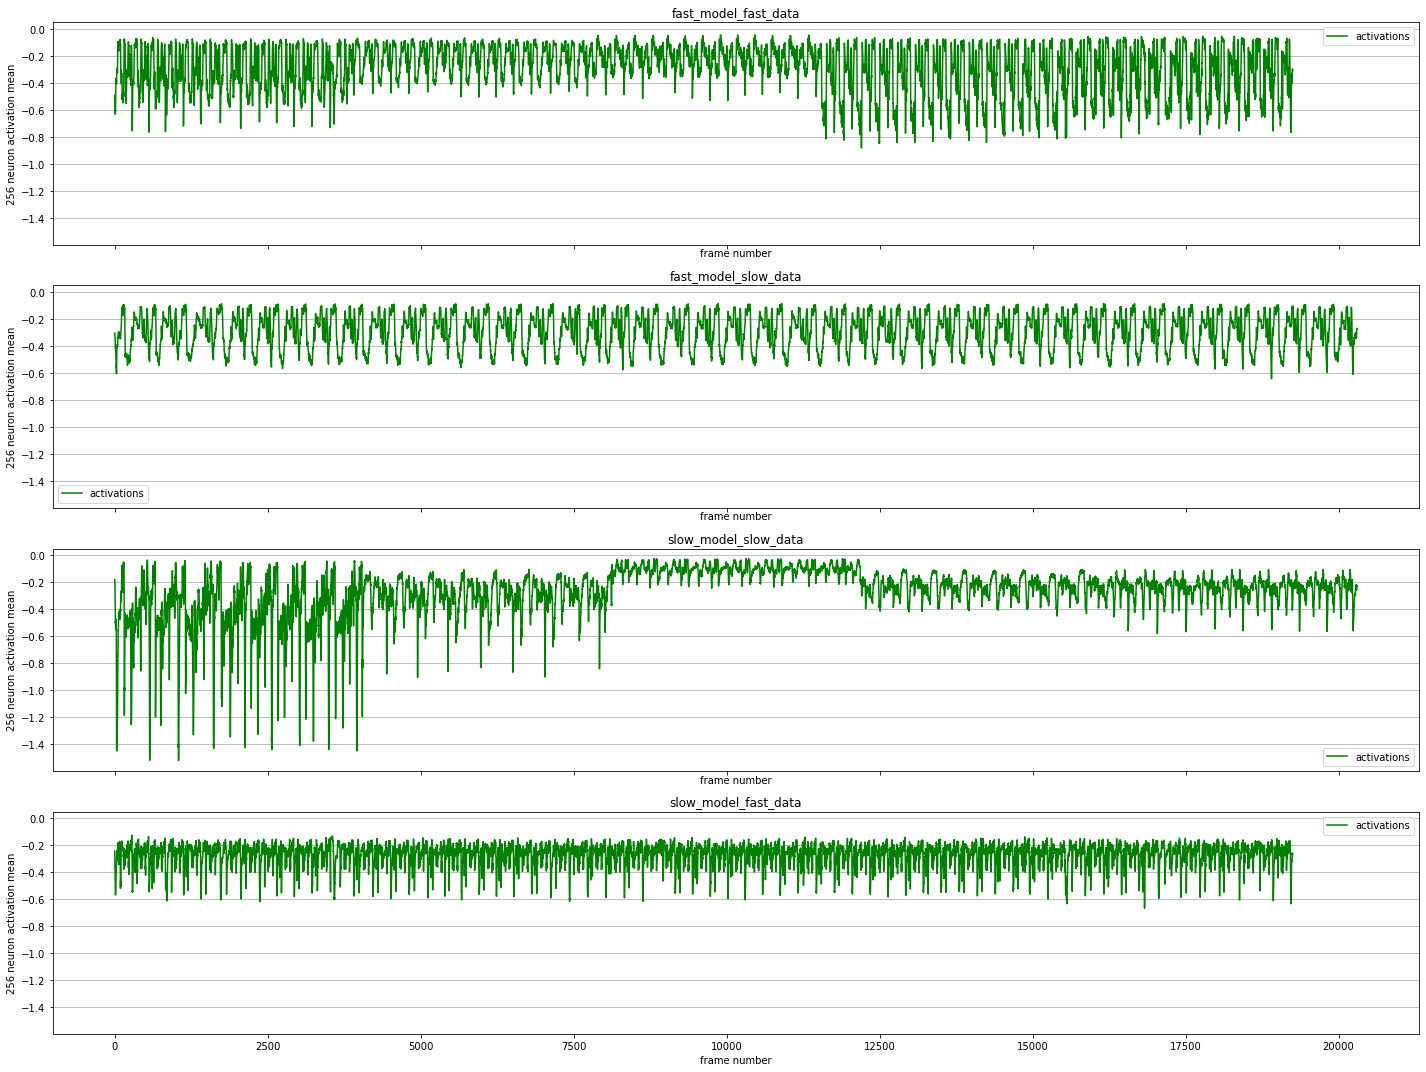

In [4]:
from matplotlib import pyplot as plt

frame_activations = dict(
    fast_model_fast_data=fast_model_fast_data.mean(axis=1),
    fast_model_slow_data=fast_model_slow_data.mean(axis=1),
    slow_model_slow_data=slow_model_slow_data.mean(axis=1),
    slow_model_fast_data=slow_model_fast_data.mean(axis=1),
)

def plot_activations(activations, ylabel, xlabel):
    fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(20, 15), sharex='all', sharey='all')
    for (name, data), ax in zip(activations.items(), axs.flat):
        ax.set(title=name, ylabel=ylabel, xlabel=xlabel)
        ax.grid(True, axis='y')

        ax.plot(data, 'g', label='activations')
        ax.legend()
    fig.tight_layout()
    plt.show()


plot_activations(frame_activations, '256 neuron activation mean', 'frame number')

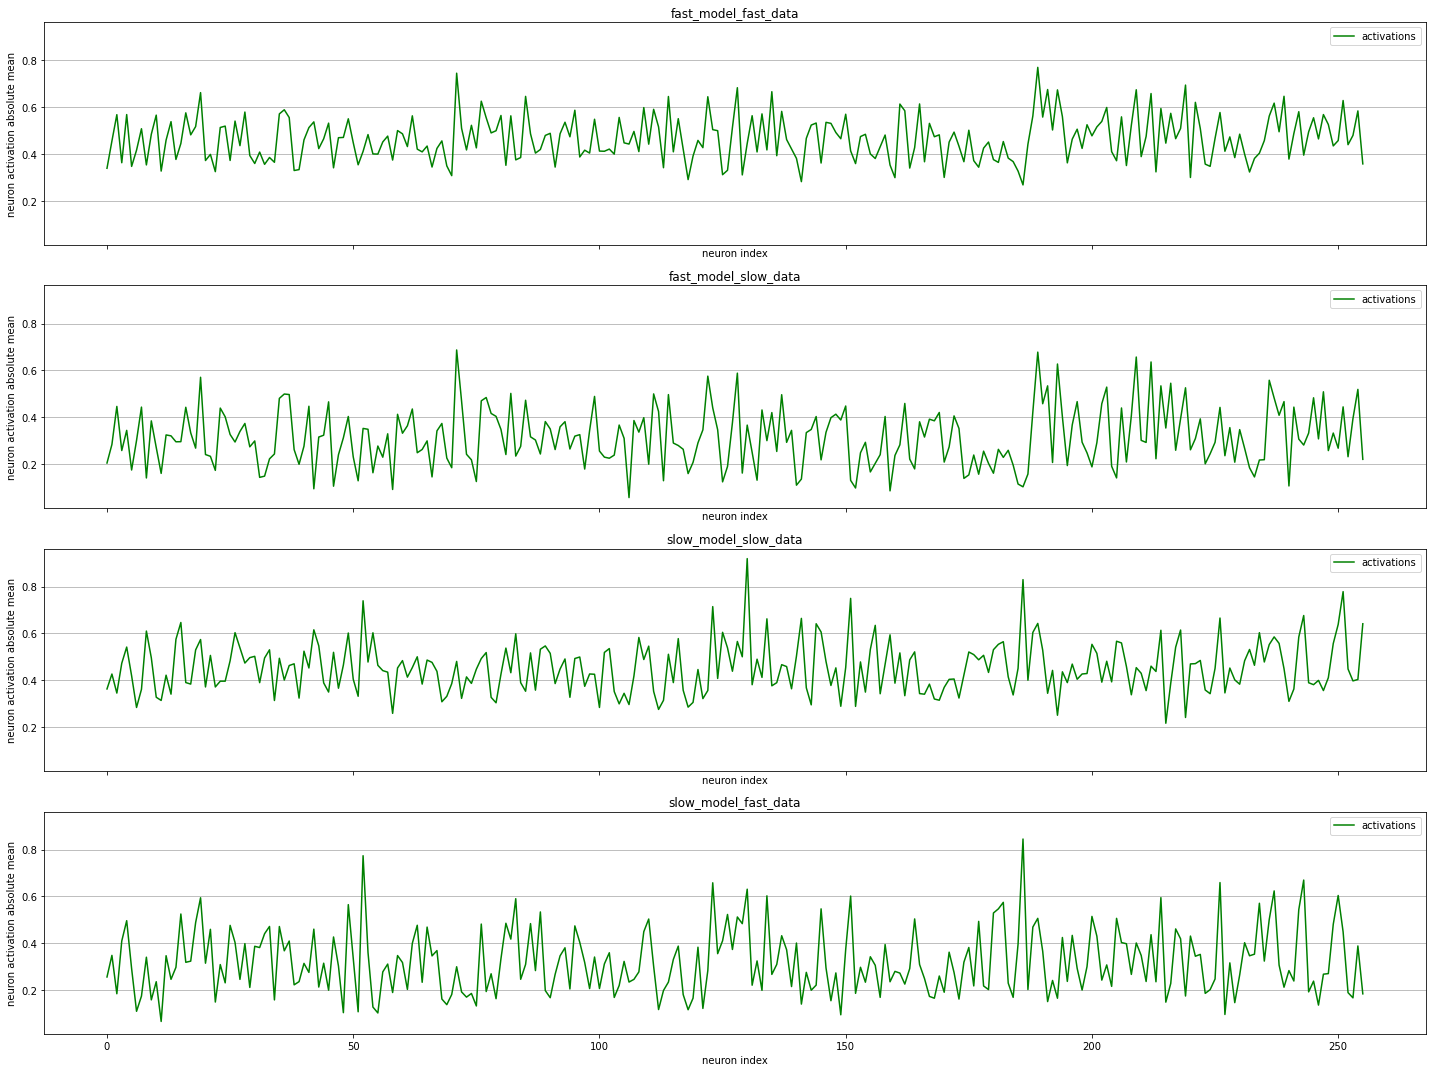

In [7]:
neuron_activations = dict(
    fast_model_fast_data=np.abs(fast_model_fast_data).mean(axis=0),
    fast_model_slow_data=np.abs(fast_model_slow_data).mean(axis=0),
    slow_model_slow_data=np.abs(slow_model_slow_data).mean(axis=0),
    slow_model_fast_data=np.abs(slow_model_fast_data).mean(axis=0),
)

plot_activations(neuron_activations, 'neuron activation absolute mean', 'neuron index')